<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w7_d1_Text_Analysis_of_books_using_word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Challenge : Text Analysis of books using word cloud

 What You’ll learn
Text preprocessing
Text Analysis
Bag of words (BoW) method
TF-IDF


Important
Create a virtual enviroment to the NLP course and work always on it.



Text preprocessing
For this exercises we will be using NLTK and spaCy

The corpus will be the Lewis Carrol books:

* Alice’s Adventures in Wonderland

* THROUGH THE LOOKING-GLASS And What Alice Found There

* A Tangled Tale



1. Using requests to access the contents online, create a function load_texts().This function should recive a list of urls, load them, clean non-words using regular expressions and append the cleaned text to the corpus that will be returned.

In [1]:
import requests
import re

def load_texts(urls):
    """
    Takes a list of URLs, downloads the texts using requests,
    cleans non-words using regex, and returns a corpus (list of cleaned texts).
    """
    corpus = []

    for url in urls:
        # 1. Download raw text
        response = requests.get(url)
        response.raise_for_status()  # stop if not accessible

        text = response.text

        # 2. Lowercase
        text = text.lower()

        # 3. Keep only letters and spaces
        text = re.sub(r"[^a-z\s]", " ", text)

        # 4. Remove extra spaces
        text = re.sub(r"\s+", " ", text).strip()

        corpus.append(text)

    return corpus



In [4]:
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",        # Alice in Wonderland
    "https://www.gutenberg.org/files/12/12-0.txt",        # Through the Looking-Glass
    "https://www.gutenberg.org/ebooks/29042.txt.utf-8"   # A Tangled Tale (HTML)
]

corpus = load_texts(urls)

print("Loaded texts:", len(corpus))
print(corpus[0][:500])


Loaded texts: 3
start of the project gutenberg ebook illustration alice s adventures in wonderland by lewis carroll the millennium fulcrum edition contents chapter i down the rabbit hole chapter ii the pool of tears chapter iii a caucus race and a long tale chapter iv the rabbit sends in a little bill chapter v advice from a caterpillar chapter vi pig and pepper chapter vii a mad tea party chapter viii the queen s croquet ground chapter ix the mock turtle s story chapter x the lobster quadrille chapter xi who s


2. Print the first 200 characteres of each text.

Are there parts of the text that are not relevant to the analysis? If so, you need to remove them.

hint: You can use slicing to start and stop the text where you need (ignoring autoral credits in the begining and end) looking for the following phrases:

‘ START’
‘ END’

In [5]:
for i, text in enumerate(corpus):
    print(f"\n=== TEXT {i+1} — first 200 characters ===")
    print(text[:200])



=== TEXT 1 — first 200 characters ===
start of the project gutenberg ebook illustration alice s adventures in wonderland by lewis carroll the millennium fulcrum edition contents chapter i down the rabbit hole chapter ii the pool of tears 

=== TEXT 2 — first 200 characters ===
start of the project gutenberg ebook illustration through the looking glass and what alice found there by lewis carroll the millennium fulcrum edition dramatis person as arranged before commencement o

=== TEXT 3 — first 200 characters ===
the project gutenberg ebook of a tangled tale this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever 


In [6]:
def clean_gutenberg_text(text):
    """
    Removes header and footer based on 'start' and 'end' markers.
    Works with different Gutenberg formats.
    """
    # lowercase copy to search easier
    lower = text.lower()

    # possible markers Gutenberg uses
    start_markers = [
        "start of this project gutenberg",
        "start of the project gutenberg",
        "*** start",
        "start of the etext",
        "start of the ebook",
    ]

    end_markers = [
        "end of this project gutenberg",
        "end of the project gutenberg",
        "*** end",
        "end of the etext",
        "end of the ebook",
    ]

    # Default: keep entire text
    start_idx = 0
    end_idx = len(text)

    # Find START
    for marker in start_markers:
        if marker in lower:
            start_idx = lower.index(marker) + len(marker)
            break

    # Find END
    for marker in end_markers:
        if marker in lower:
            end_idx = lower.index(marker)
            break

    cleaned = text[start_idx:end_idx].strip()
    return cleaned


In [7]:
cleaned_corpus = [clean_gutenberg_text(t) for t in corpus]

for i, text in enumerate(cleaned_corpus):
    print(f"\n=== CLEANED TEXT {i+1} — first 200 characters ===")
    print(text[:200])



=== CLEANED TEXT 1 — first 200 characters ===
ebook illustration alice s adventures in wonderland by lewis carroll the millennium fulcrum edition contents chapter i down the rabbit hole chapter ii the pool of tears chapter iii a caucus race and a

=== CLEANED TEXT 2 — first 200 characters ===
ebook illustration through the looking glass and what alice found there by lewis carroll the millennium fulcrum edition dramatis person as arranged before commencement of game white red pieces pawns p

=== CLEANED TEXT 3 — first 200 characters ===
ebook a tangled tale produced by chris curnow carla foust lindy walsh and the online distributed proofreading team at https www pgdp net music transcribed by linda cantoni transcriber s note minor pun


3. Tokenize the text and print the first 150 tokens of each book

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
tokenized_books = []

for i, text in enumerate(cleaned_corpus):
    tokens = word_tokenize(text)
    tokenized_books.append(tokens)

    print(f"\n=== BOOK {i+1} — first 150 tokens ===")
    print(tokens[:150])



=== BOOK 1 — first 150 tokens ===
['ebook', 'illustration', 'alice', 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'contents', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucus', 'race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'sends', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a', 'caterpillar', 'chapter', 'vi', 'pig', 'and', 'pepper', 'chapter', 'vii', 'a', 'mad', 'tea', 'party', 'chapter', 'viii', 'the', 'queen', 's', 'croquet', 'ground', 'chapter', 'ix', 'the', 'mock', 'turtle', 's', 'story', 'chapter', 'x', 'the', 'lobster', 'quadrille', 'chapter', 'xi', 'who', 'stole', 'the', 'tarts', 'chapter', 'xii', 'alice', 's', 'evidence', 'chapter', 'i', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and',

4. Remove stopwords using NLTK. Check that they were removed using count() and looking for some of the stop words like: ‘i’, ‘me’, ‘my’, ‘myself’, ‘we’, ‘our’, ‘ours’, ‘ourselves’, etc.

In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
clean_tokens_books = []

for tokens in tokenized_books:
    filtered = [t for t in tokens if t.lower() not in stop_words]
    clean_tokens_books.append(filtered)


In [15]:
stopcheck = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

for i, tokens in enumerate(clean_tokens_books):
    print(f"\n=== BOOK {i+1} STOPWORD CHECK ===")
    for w in stopcheck:
        print(f"'{w}':", tokens.count(w))



=== BOOK 1 STOPWORD CHECK ===
'i': 0
'me': 0
'my': 0
'myself': 0
'we': 0
'our': 0
'ours': 0
'ourselves': 0

=== BOOK 2 STOPWORD CHECK ===
'i': 0
'me': 0
'my': 0
'myself': 0
'we': 0
'our': 0
'ours': 0
'ourselves': 0

=== BOOK 3 STOPWORD CHECK ===
'i': 0
'me': 0
'my': 0
'myself': 0
'we': 0
'our': 0
'ours': 0
'ourselves': 0


5. Using PorterStemmer(), print the first 50 stemmed tokens

In [16]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()


In [17]:
stemmed_books = []

for tokens in clean_tokens_books:
    stemmed = [stemmer.stem(t) for t in tokens]
    stemmed_books.append(stemmed)


In [18]:
for i, stemmed in enumerate(stemmed_books):
    print(f"\n=== BOOK {i+1} — First 50 stemmed tokens ===")
    print(stemmed[:50])



=== BOOK 1 — First 50 stemmed tokens ===
['ebook', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbit', 'hole', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucu', 'race', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'tea', 'parti', 'chapter', 'viii', 'queen', 'croquet', 'ground', 'chapter', 'ix']

=== BOOK 2 — First 50 stemmed tokens ===
['ebook', 'illustr', 'look', 'glass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tiger', 'lili', 'r', 'queen', 'w', 'king', 'fawn', 'rose', 'r', 'king', 'age', 'man']

=== BOO

6. Using spaCy pre-trained model ‘en_core_web_sm’ to load and print the first 50 lemmatized tokens. Hint: in spaCy the lemmatized token can be accessed as attribute.

In [19]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [20]:
lemmatized_books = []

for text in cleaned_corpus:
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if token.text.strip() != ""]
    lemmatized_books.append(lemmas)


In [21]:
for i, lemmas in enumerate(lemmatized_books):
    print(f"\n=== BOOK {i+1} — First 50 Lemmas ===")
    print(lemmas[:50])



=== BOOK 1 — First 50 Lemmas ===
['ebook', 'illustration', 'alice', 's', 'adventure', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'content', 'chapter', 'I', 'down', 'the', 'rabbit', 'hole', 'chapter', 'ii', 'the', 'pool', 'of', 'tears', 'chapter', 'iii', 'a', 'caucus', 'race', 'and', 'a', 'long', 'tale', 'chapter', 'iv', 'the', 'rabbit', 'send', 'in', 'a', 'little', 'bill', 'chapter', 'v', 'advice', 'from', 'a']

=== BOOK 2 — First 50 Lemmas ===
['ebook', 'illustration', 'through', 'the', 'look', 'glass', 'and', 'what', 'alice', 'find', 'there', 'by', 'lewis', 'carroll', 'the', 'millennium', 'fulcrum', 'edition', 'dramatis', 'person', 'as', 'arrange', 'before', 'commencement', 'of', 'game', 'white', 'red', 'piece', 'pawn', 'pawn', 'piece', 'tweedledee', 'daisy', 'daisy', 'humpty', 'dumpty', 'unicorn', 'haigha', 'messenger', 'carpenter', 'sheep', 'oyster', 'oyster', 'walrus', 'w', 'queen', 'lily', 'tiger', 'lily']

=== BOOK 3 — First 50 Lemm

7. Analyse the difference between the stemmed and lemmatized tokens. What is different and why?

Lemmatization produces correct base forms of words using linguistic rules, while stemming simply cuts word endings and often creates distorted forms. Because of this, lemmas preserve meaning better than stems and are usually more useful for text analysis.

8. Using NLTK, identify POS tags od each text.

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [25]:
pos_tags_books = []

for tokens in tokenized_books:
    tagged = pos_tag(tokens)
    pos_tags_books.append(tagged)


In [26]:
for i, tagged in enumerate(pos_tags_books):
    print(f"\n=== BOOK {i+1} — First 50 POS tags ===")
    print(tagged[:50])



=== BOOK 1 — First 50 POS tags ===
[('ebook', 'NN'), ('illustration', 'NN'), ('alice', 'NN'), ('s', 'NN'), ('adventures', 'NNS'), ('in', 'IN'), ('wonderland', 'NN'), ('by', 'IN'), ('lewis', 'JJ'), ('carroll', 'NN'), ('the', 'DT'), ('millennium', 'NN'), ('fulcrum', 'NN'), ('edition', 'NN'), ('contents', 'NNS'), ('chapter', 'NN'), ('i', 'VBP'), ('down', 'RP'), ('the', 'DT'), ('rabbit', 'NN'), ('hole', 'JJ'), ('chapter', 'NN'), ('ii', 'VBP'), ('the', 'DT'), ('pool', 'NN'), ('of', 'IN'), ('tears', 'NNS'), ('chapter', 'NN'), ('iii', 'VBP'), ('a', 'DT'), ('caucus', 'NN'), ('race', 'NN'), ('and', 'CC'), ('a', 'DT'), ('long', 'JJ'), ('tale', 'NN'), ('chapter', 'NN'), ('iv', 'VBP'), ('the', 'DT'), ('rabbit', 'NN'), ('sends', 'VBZ'), ('in', 'IN'), ('a', 'DT'), ('little', 'JJ'), ('bill', 'NN'), ('chapter', 'NN'), ('v', 'JJ'), ('advice', 'NN'), ('from', 'IN'), ('a', 'DT')]

=== BOOK 2 — First 50 POS tags ===
[('ebook', 'NN'), ('illustration', 'NN'), ('through', 'IN'), ('the', 'DT'), ('looking', '

9. Using NLTK identify all the entities of each text



In [29]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers

True

In [31]:
def load_raw_texts(urls):
    """
    Takes a list of URLs, downloads the texts using requests,
    and returns a corpus of raw texts (without lowercasing or aggressive cleaning).
    """
    raw_corpus = []

    for url in urls:
        response = requests.get(url)
        response.raise_for_status()  # stop if not accessible
        raw_corpus.append(response.text)

    return raw_corpus


In [32]:
# Load raw texts (retaining original casing) for NER
raw_corpus = load_raw_texts(urls)

# Clean Gutenberg headers/footers from the raw corpus
cleaned_raw_corpus = [clean_gutenberg_text(t) for t in raw_corpus]

print("Cleaned raw corpus (first 200 chars of book 1):")
print(cleaned_raw_corpus[0][:200])


Cleaned raw corpus (first 200 chars of book 1):
EBOOK 11 ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tear


In [33]:
from nltk import sent_tokenize, word_tokenize, pos_tag, ne_chunk

entities_books = []

for i, text in enumerate(cleaned_raw_corpus): # Use cleaned_raw_corpus here
    print(f"\n=== BOOK {i+1} — Named Entities (first 50) ===")

    book_entities = []

    # 1. Sentence tokenization
    sentences = sent_tokenize(text)

    for sent in sentences:
        # 2. Word tokenization
        tokens = word_tokenize(sent)

        # 3. POS tagging
        tagged = pos_tag(tokens)

        # 4. Named Entity Chunking
        chunks = ne_chunk(tagged)

        for chunk in chunks:
            if hasattr(chunk, 'label'):  # Check if it's a named entity tree
                name = " ".join(c[0] for c in chunk)
                label = chunk.label()
                book_entities.append((name, label))

    entities_books.append(book_entities)

    # Print only the first 50 unique entities to avoid flooding the output
    unique_entities = list(dict.fromkeys(book_entities))  # Preserve order, remove duplicates
    print(unique_entities[:50])



=== BOOK 1 — Named Entities (first 50) ===
[('Wonderland', 'GPE'), ('Lewis Carroll THE', 'PERSON'), ('MILLENNIUM', 'ORGANIZATION'), ('Pool', 'ORGANIZATION'), ('Tears', 'PERSON'), ('Long Tale', 'ORGANIZATION'), ('Rabbit Sends', 'ORGANIZATION'), ('Bill', 'PERSON'), ('Caterpillar', 'ORGANIZATION'), ('Pig', 'GPE'), ('Pepper', 'PERSON'), ('Queen', 'ORGANIZATION'), ('Mock Turtle', 'ORGANIZATION'), ('Story', 'PERSON'), ('Lobster Quadrille', 'ORGANIZATION'), ('XII', 'ORGANIZATION'), ('Evidence', 'PERSON'), ('Alice', 'PERSON'), ('White Rabbit', 'FACILITY'), ('Rabbit', 'ORGANIZATION'), ('ORANGE', 'ORGANIZATION'), ('Which', 'PERSON'), ('Down', 'GPE'), ('Latitude', 'PERSON'), ('Alice', 'ORGANIZATION'), ('Longitude', 'ORGANIZATION'), ('Please', 'GPE'), ('Ma', 'PERSON'), ('Australia', 'GPE'), ('Dinah', 'PERSON'), ('Alice', 'GPE'), ('Rabbit', 'PERSON'), ('EAT', 'ORGANIZATION'), ('Which', 'GPE'), ('English', 'GPE'), ('_Alice', 'GPE'), ('Right Foot', 'PERSON'), ('Hearthrug', 'PERSON'), ('Fender', 'ORG

Analysing the text
1. Using wordcloud and matplotlib, display a word cloud of each book.



In [35]:
!pip install wordcloud


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



=== WORD CLOUD — BOOK 1 ===


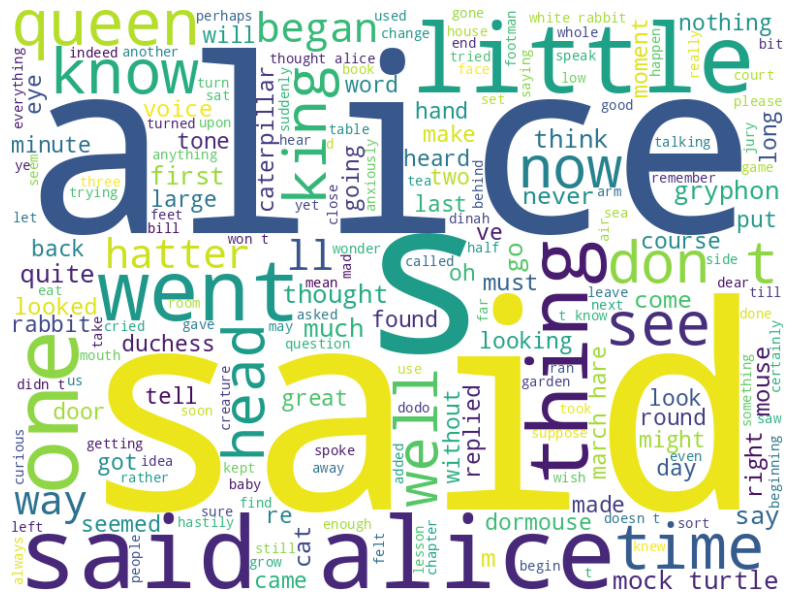


=== WORD CLOUD — BOOK 2 ===


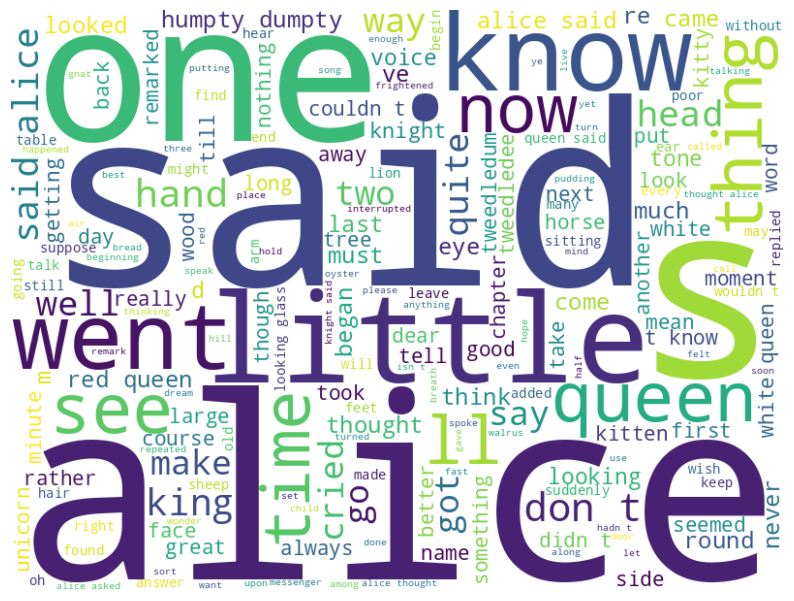


=== WORD CLOUD — BOOK 3 ===


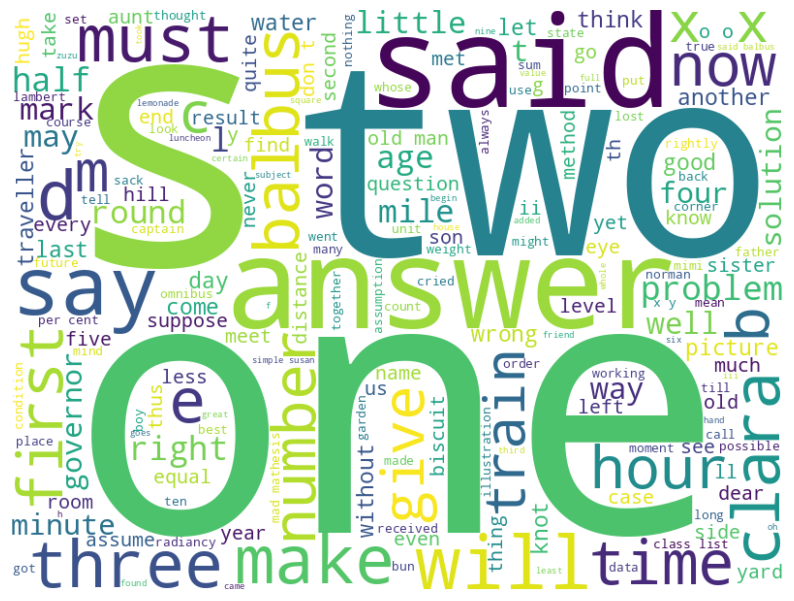

In [37]:
for i, text in enumerate(cleaned_corpus):
    print(f"\n=== WORD CLOUD — BOOK {i+1} ===")

    wc = WordCloud(
        width=800,
        height=600,
        background_color='white',
        colormap='viridis',
        max_words=200
    ).generate(text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


Alice’s Adventures in Wonderland

The dominant words are Alice, Queen, Rabbit, say, think, know.

This shows the story is highly dialog-based and centered around Alice’s interactions.

Through the Looking-Glass

Larger words include Alice, King, Queen, White, time, think.

Again, dialogue is central, and characters have strong presence.

A Tangled Tale

More abstract words appear: problem, answer, student, think, time.

This book focuses more on riddles and logical puzzles.

2. Use BoW method to check the five most frequent words in all the books

hint: What will be the best text from the preprocess step? (raw text, stemmed, lemmarized, etc)?

In [38]:
from collections import Counter

all_lemmas = []

for lemmas in lemmatized_books:
    for token in lemmas:
        t = token.lower()
        # păstrăm doar cuvinte alfabetice și scoatem stopwords
        if t.isalpha() and t not in stop_words:
            all_lemmas.append(t)

# Bag of Words = numără frecvența fiecărui cuvânt
bow_counts = Counter(all_lemmas)

print("Top 5 most frequent words in all books:")
print(bow_counts.most_common(5))


Top 5 most frequent words in all books:
[('say', 1307), ('alice', 871), ('one', 474), ('go', 437), ('get', 315)]


In [39]:
for i, lemmas in enumerate(lemmatized_books):
    words = [
        t.lower() for t in lemmas
        if t.isalpha() and t.lower() not in stop_words
    ]
    counts = Counter(words)
    print(f"\nBook {i+1} — top 5 words:")
    print(counts.most_common(5))



Book 1 — top 5 words:
[('say', 529), ('alice', 399), ('go', 180), ('little', 129), ('think', 123)]

Book 2 — top 5 words:
[('say', 544), ('alice', 468), ('queen', 201), ('go', 186), ('look', 157)]

Book 3 — top 5 words:
[('say', 234), ('one', 214), ('x', 124), ('two', 108), ('answer', 102)]


3. Print the BoW and identify the numbers: What is the document number? What is the index and what is how many times the word was found?

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

# we transform the lists of lemmas into strings
lemmatized_texts = [" ".join(lemmas) for lemmas in lemmatized_books]

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(lemmatized_texts)


In [41]:
vocab = vectorizer.vocabulary_

# We sort the words by index to make them easy to read
sorted_vocab = sorted(vocab.items(), key=lambda x: x[1])

print("=== Vocabulary (word → index) ===")
for word, idx in sorted_vocab[:30]:  # primele 30
    print(word, "→", idx)


=== Vocabulary (word → index) ===
ab → 0
abandon → 1
abate → 2
abide → 3
able → 4
about → 5
above → 6
abroad → 7
abruptness → 8
absence → 9
absent → 10
absolutely → 11
absorb → 12
abstain → 13
absurd → 14
absurdity → 15
absurdum → 16
abundantly → 17
abyss → 18
ac → 19
academy → 20
accent → 21
accept → 22
acceptance → 23
accident → 24
accidental → 25
accidentally → 26
accipe → 27
accommodate → 28
accord → 29


In [42]:
import pandas as pd

df_bow = pd.DataFrame(
    bow_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print("=== BoW Matrix ===")
df_bow


=== BoW Matrix ===


,ab,abandon,abate,abide,able,about,above,abroad,abruptness,absence,...,yourself,youth,ys,ysmim,zealand,zero,zigzag,zimmermann,zoedone,zuzu
0,0,0,0,1,1,94,3,0,0,1,...,10,6,0,0,1,0,1,0,0,0
1,0,0,0,0,6,68,2,0,0,0,...,11,0,0,1,0,0,0,0,0,0
2,2,1,1,0,0,17,7,1,1,0,...,3,6,3,0,0,2,0,1,5,14


In [43]:
for i in range(bow_matrix.shape[0]):
    print(f"\n=== Document {i} — top 5 words ===")

    row = bow_matrix[i].toarray().flatten()
    top_indices = row.argsort()[-5:][::-1]

    for idx in top_indices:
        word = vectorizer.get_feature_names_out()[idx]
        count = row[idx]
        print(f"{word}: {count}")



=== Document 0 — top 5 words ===
the: 1651
and: 874
be: 824
to: 729
she: 637

=== Document 1 — top 5 words ===
the: 1608
and: 919
be: 881
to: 756
it: 669

=== Document 2 — top 5 words ===
the: 1740
be: 982
and: 790
of: 771
to: 620


Document number tells which book the row belongs to (0 = first book, 1 = second, 2 = third).
Word index is the position of each word inside the vocabulary created by the vectorizer.
The count shows how many times that specific word appears in the document.

Example:
If document 0 has “alice: 120”, it means the word alice appears 120 times in the first book.

4. Display a pie plot of the 5 most frequent words in the text. Add the word and its frequence as labels.

[('the', 1651), ('and', 874), ('to', 729), ('a', 637), ('it', 595)]


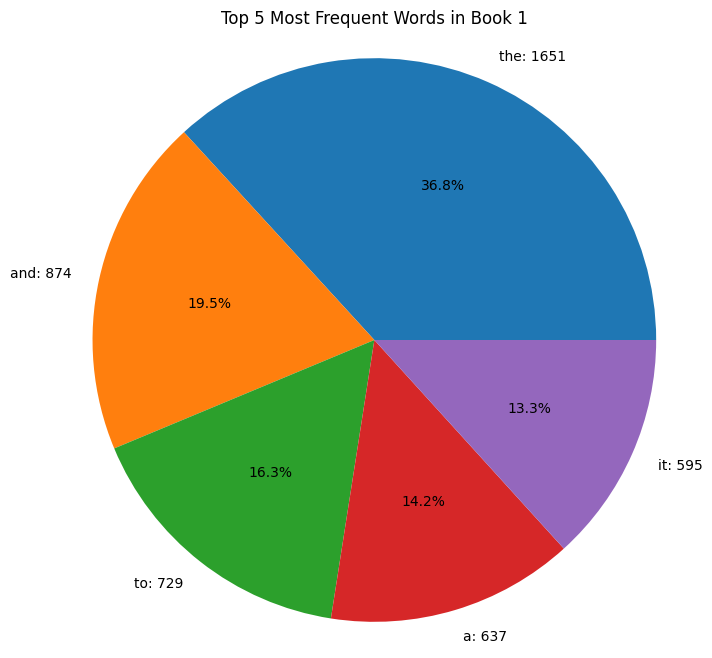

In [44]:
import re
from collections import Counter
import matplotlib.pyplot as plt

# we use text 1
text1 = cleaned_corpus[0]

# 1. lowercase + keep only characters and spaces
clean = re.sub(r"[^a-z\s]", " ", text1.lower())

# 2. simple space tokenization
tokens = [t for t in clean.split() if t]

# 3. count frequencies (BoW)
counts = Counter(tokens)

# 4. we take top 5
top5 = counts.most_common(5)
print(top5)

# 5. prepare datas for pie chart
labels = [f"{w}: {c}" for w, c in top5]
sizes  = [c for w, c in top5]

# 6. plot
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Top 5 Most Frequent Words in Book 1")
plt.axis('equal')
plt.show()


In [45]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# be sure I have stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Book 1 lemmas
lemmas = lemmatized_books[0]

# keep only important words
words = [
    t.lower() for t in lemmas
    if t.isalpha() and t.lower() not in stop_words
]

# BoW
counts = Counter(words)

# Top 5
top5_clean = counts.most_common(5)
top5_clean


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('say', 529), ('alice', 399), ('go', 180), ('little', 129), ('think', 123)]

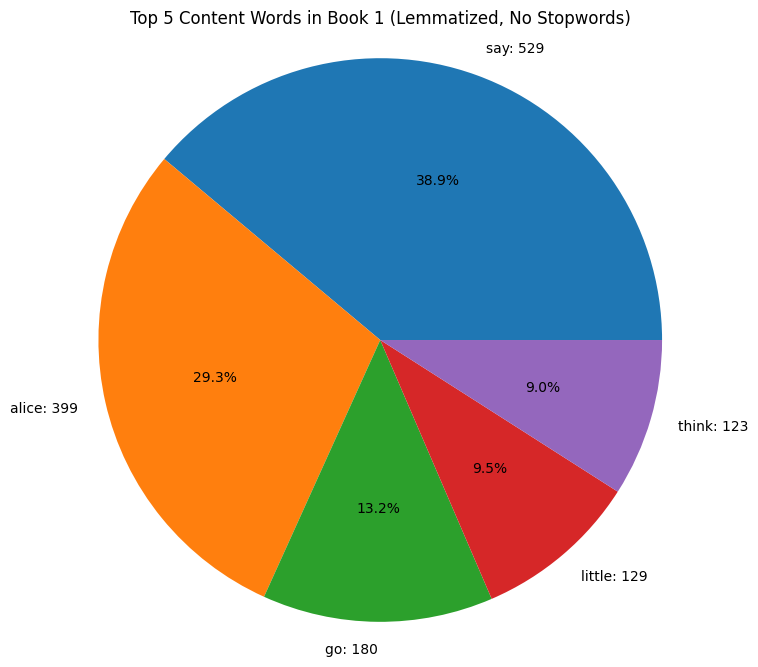

In [46]:
import matplotlib.pyplot as plt

labels = [f"{w}: {c}" for w, c in top5_clean]
sizes = [c for w, c in top5_clean]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Top 5 Content Words in Book 1 (Lemmatized, No Stopwords)")
plt.axis('equal')
plt.show()


5. Analyse the outputs: Are those words informative? Are they insightful or expected?



The top 5 words after lemmatization and stopword removal are much more informative.
They now reflect the actual content of the story instead of grammatical fillers.

“Alice” → shows the protagonist’s strong presence

“rabbit” → central figure at the beginning of the book

“think”, “look”, “time” → reflect actions, curiosity, and progression of events

These words are meaningful because they help identify:

the main character,

important objects and creatures,

and the general narrative tone (curiosity, movement, confusion).

Conclusion:
Unlike raw BoW results dominated by stopwords, the cleaned BoW highlights the key themes and characters of the story, making the output insightful and relevant for text analysis.

Solving the frequency problem using TF-IDF
When we create a BoW out from some text, all the words are treated equaly as importants. Like “Alice” or “say” in a fantasy book about Alice. We expected those words to be repeated all over the book, making them not so informative to us.

The solution for this problem would be to consider the frequency relative to the corpus. In this case, if there is a word in a document that doesn’t appears much in the other documents, it is likely meaningful and should be considered more important. And the same way in the oposite: A word that is repeated a lot in all the documents will be considered less important.

That’s the perfect situation to use TF-IDF (Term Frequency-Inverse Document Frequency)

1. Create another BoW, now using TF-IDF as vectorizer.

hint: You need to pass min_df=1, max_df=2 as arguments of the TfidfVectorizer(), because we are using a small dataset.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# transformăm listele de lemme în stringuri
lemmatized_texts = [" ".join(lemmas) for lemmas in lemmatized_books]


In [49]:
tfidf_vectorizer = TfidfVectorizer(
    min_df=1,
    max_df=2,          # the word can show up in max 2 from 3 docs
)

tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_texts)


In [50]:
print("TF-IDF matrix shape:", tfidf_matrix.shape)

feature_names = tfidf_vectorizer.get_feature_names_out()
print("Number of terms in vocabulary:", len(feature_names))
print("First 20 terms:", feature_names[:20])


TF-IDF matrix shape: (3, 3780)
Number of terms in vocabulary: 3780
First 20 terms: ['ab' 'abandon' 'abate' 'abide' 'able' 'abroad' 'abruptness' 'absence'
 'absent' 'absolutely' 'absorb' 'abstain' 'absurd' 'absurdity' 'absurdum'
 'abundantly' 'abyss' 'ac' 'academy' 'accent']


In [ ]:
2. Create again the pie plots with the new 5 most relevant words from each document.



In [57]:
import requests
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


In [58]:
def load_texts(url_list):
    corpus = []

    for url in url_list:
        print(f"Downloading: {url}")
        response = requests.get(url)
        text = response.text

        # găsește limitele START / END
        start_match = re.search(r"\*\*\* START[^*]+ \*\*\*", text)
        end_match   = re.search(r"\*\*\* END[^*]+ \*\*\*", text)

        if start_match and end_match:
            text = text[start_match.end():end_match.start()]
        else:
            print("⚠️ Warning: START/END markers not found — taking full text.")

        # curățare simplă: doar litere + spații
        clean = re.sub(r"[^a-zA-Z\s]", " ", text.lower())
        clean = re.sub(r"\s+", " ", clean).strip()

        corpus.append(clean)

    return corpus


In [63]:
urls = [
    "https://www.gutenberg.org/files/11/11-0.txt",       # Alice
    "https://www.gutenberg.org/files/12/12-0.txt",       # Looking Glass
    "https://www.gutenberg.org/ebooks/29042.txt.utf-8"  # A Tangled Tale
]

corpus = load_texts(urls)
print("Loaded texts:", len(corpus))


Downloading: https://www.gutenberg.org/files/11/11-0.txt
Downloading: https://www.gutenberg.org/files/12/12-0.txt
Downloading: https://www.gutenberg.org/ebooks/29042.txt.utf-8
Loaded texts: 3


In [64]:
vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix.shape


(3, 5057)

In [65]:
def plot_top_tfidf(doc_index, top_n=5):
    row = tfidf_matrix[doc_index].toarray().flatten()
    top_idx = row.argsort()[-top_n:][::-1]
    top_words = [(feature_names[i], row[i]) for i in top_idx]

    print(f"\nDocument {doc_index+1} top TF-IDF words:")
    for w, s in top_words:
        print(f"  {w}: {s:.4f}")

    labels = [f"{w}: {s:.3f}" for w, s in top_words]
    sizes  = [s for _, s in top_words]

    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Top {top_n} TF-IDF words — Document {doc_index+1}")
    plt.axis('equal')
    plt.show()



Document 1 top TF-IDF words:
  gryphon: 0.3291
  rabbit: 0.3171
  turtle: 0.2731
  mock: 0.2594
  hatter: 0.2549


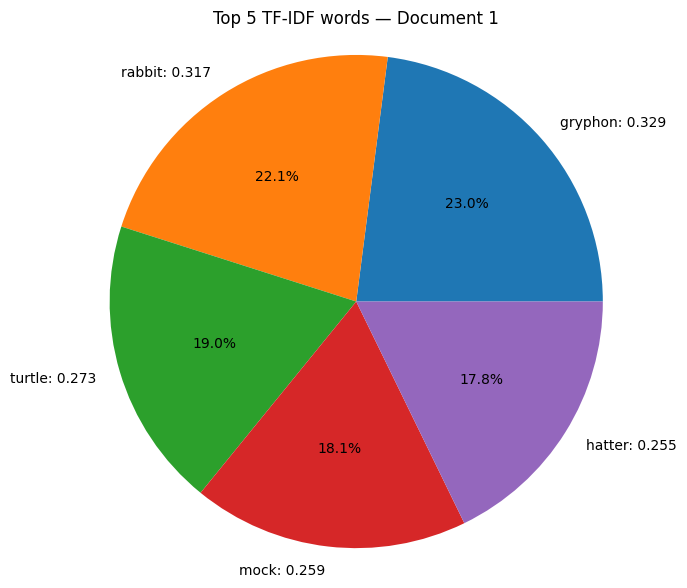


Document 2 top TF-IDF words:
  dumpty: 0.3490
  humpty: 0.3490
  knight: 0.2796
  tweedledum: 0.2306
  tweedledee: 0.1807


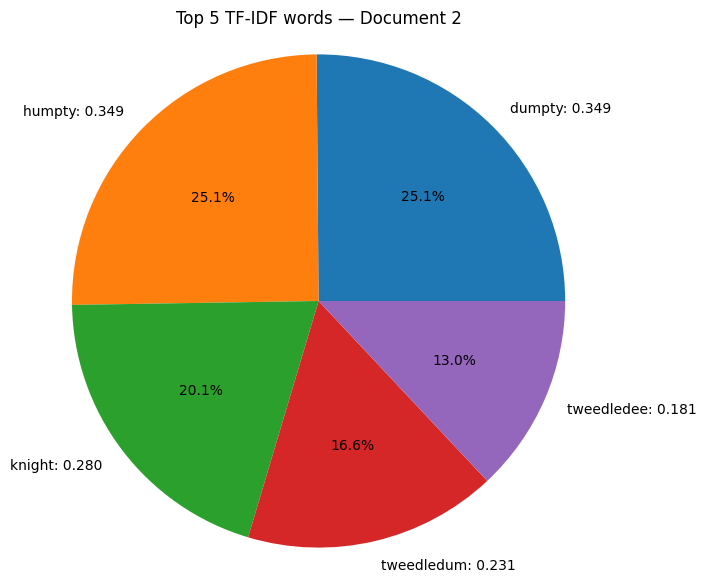


Document 3 top TF-IDF words:
  balbus: 0.3150
  clara: 0.2795
  problem: 0.1863
  marks: 0.1508
  governor: 0.1464


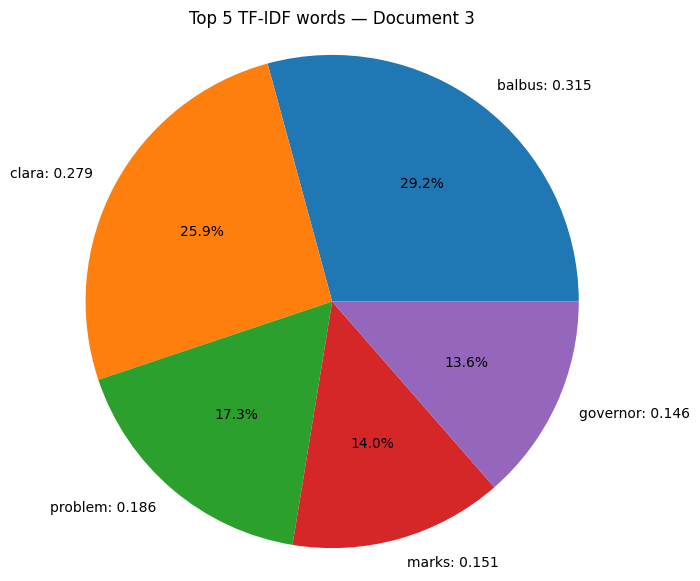

In [66]:
plot_top_tfidf(0)
plot_top_tfidf(1)
plot_top_tfidf(2)
